In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm

In [2]:
#Setting template of seaborn
sns.set(context = 'paper', palette = 'winter_r', style = 'darkgrid', rc= {'figure.facecolor': 'gray',}, font_scale=1.5)

In [3]:
# Create a function that read data from csv file and take passengerId as index of columns
def ReadCsv(data) :
    return (pd.read_csv(data, index_col = 'PassengerId'))

In [4]:
# Create dataFrame of training set and test set
traindf = ReadCsv('titanic/train.csv')
testdf = ReadCsv('titanic/test.csv')

In [5]:
# Looking for an attribute for each dataframe.
traindf.columns, testdf.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

In [6]:
# Looking at the first 5 data in training set.
traindf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## There are many columns(features) in this dataset let us break them down.

**Survived:** Wheather the person Survived or not.

**Pclass:** Passanger class indicates the class of that person aboard the ship.

**SibSp:** Shows the number of Sibling/Spouces they had.

**Parch:** Parch indicates Parents with children

**Ticket:** Ticket name/Number.

**Fare:** How much the Passenger paid.

**Cabin:** Cabin name of that Passenger.

**Embarked:** Point of Embarkation where C means Cherbourg, Q means Queenstown, S means Southampton.

### We can differentiate the data into two groups:

**Categorical:** From the dataset we can see that Survived, Pclass, Sex, Embarked are categorical. Why? they have discrete values such has 0 or 1.

**Continuous:** From the dataset we can see that Age and Fare has a value which can be measured.

In [7]:
# Checking for null or N/A value if it exist in dataset.
traindf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# EXPLORATORY ANALYSIS

C:\Users\SNatchanon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


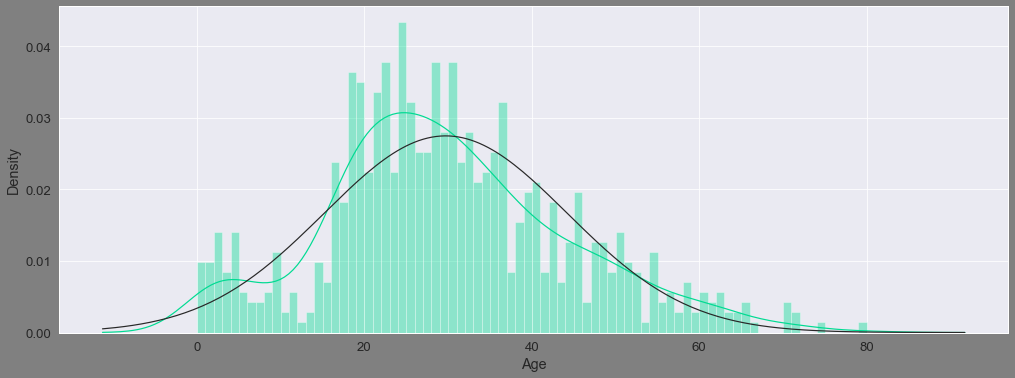

In [8]:
plt.figure(figsize = [17,6])
a = sns.distplot(traindf['Age'].dropna(), bins= range(0,81,1), fit = norm)
plt.show()

### Most of the Passengers aboard the Titanic were in the range of 16~ to 40. The age distribution shows bi-modal curve.

C:\Users\SNatchanon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SNatchanon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SNatchanon\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

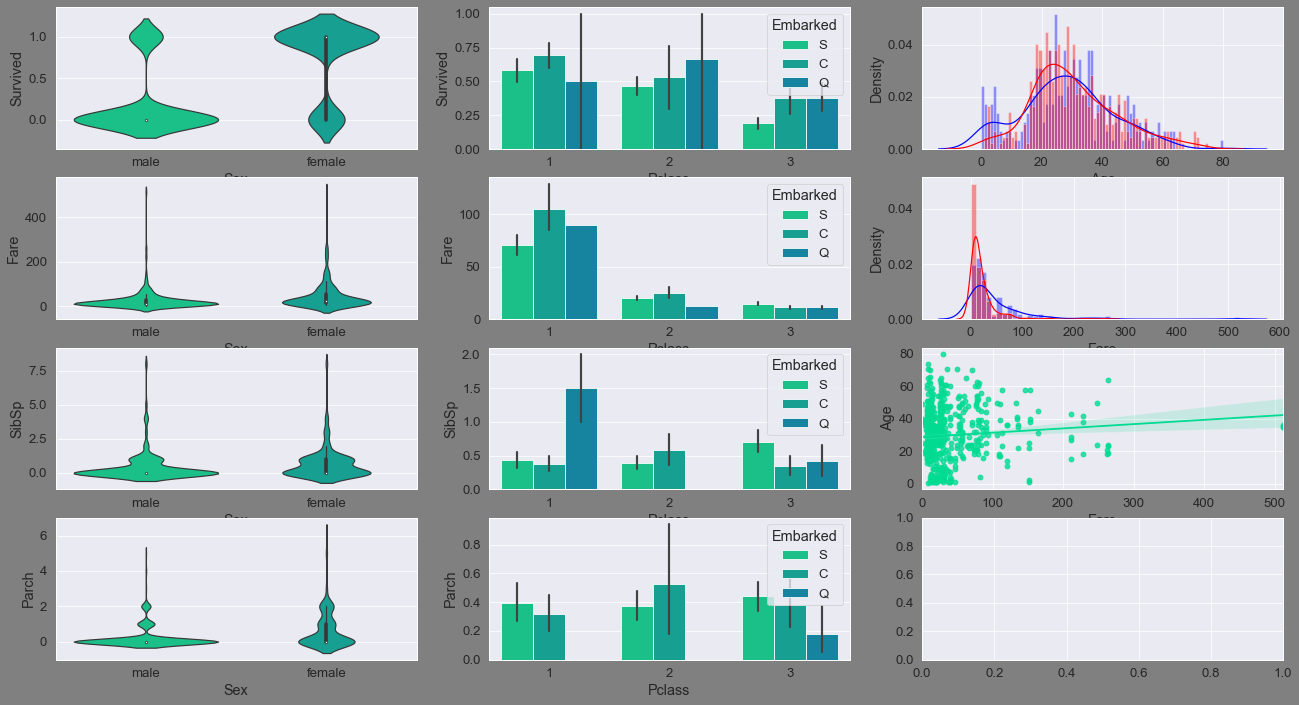

In [9]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
#sns.set_palette('Set1', 8, .75)
#sns.set_style('darkgrid')
#plt.subplot(331)
sns.violinplot(x = 'Sex', y = 'Survived', data = traindf,ax = ax[0,0])
#sns.despine(offset=10, trim=True)
#plt.subplot(332)
sns.barplot(x = 'Pclass',y ='Survived',data = traindf,hue = 'Embarked',ax = ax[0,1])
#plt.subplot(333)
sns.distplot(traindf[traindf['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(traindf[traindf['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
#plt.subplot(334)
sns.violinplot(x = 'Sex', y = 'Fare', data = traindf,ax = ax[1,0])
#plt.subplot(335)
sns.barplot(x ='Pclass', y = 'Fare',data = traindf , hue = 'Embarked', ax = ax[1,1])
#plt.subplot(336)
sns.distplot(traindf[traindf['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(traindf[traindf['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])

#plt.subplot(337)
sns.violinplot(x = 'Sex', y ='SibSp',data = traindf,ax = ax[2,0])
#plt.subplot(338)
sns.barplot(x= 'Pclass', y = 'SibSp', data = traindf, hue = 'Embarked', ax = ax[2,1])
#plt.subplot(339)
sns.regplot(x = 'Fare', y = 'Age', data = traindf, ax = ax[2,2])
#plt.subplot(341)
sns.violinplot(x = 'Sex', y = 'Parch', data = traindf, ax = ax[3,0])
#plt.subplot(342)
sns.barplot(x = 'Pclass', y = 'Parch', data = traindf, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)

1 Starting from the first graph, we can see that very few males survived as compared to female and very few females died in comparision to males.

2 First and second class had the most survival rate than the third class whereas pessangers who boarded from 'S' had the least survival rate.

3 The blue and red distribution shows whether the pessanger survived or not.

4 & 5 There were many passengers from both category who paid nothing to board the ship particularly from the third class

6 The distribution of Fare with respect to Survival blue indicating Survived while red indicating dead.

7 & 8 There were more female SibSp(siblings and spouces) as compared to male and majority of them were from First class from Q station followed by third class.

9 Distribution of Fare by Age shows that there were many passengers paying nothing being majority while a few paying more than 500!

10 & 11 By looking at the graph we can see that it is similar with SibSp to some extent with the only difference that Parch is flattened and the bar plot says that Parch there were no Passengers from Q aboard as 1st and 2nd class.

In [10]:
# From above visualize analysis we're going to look at those who paid more than 500! fare.
traindf[traindf['Fare']>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


###### Look at those Ticket, they have the same ticket names.

In [11]:
# This function shows all null values from training set and test set
def get_isnull(train, test):
    return (train.isnull().sum(), test.isnull().sum())


In [12]:
get_isnull(traindf, testdf)

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64,
 Pclass        0
 Name          0
 Sex           0
 Age          86
 SibSp         0
 Parch         0
 Ticket        0
 Fare          1
 Cabin       327
 Embarked      0
 dtype: int64)

In [13]:
# Function for concatation so that we won't have to repeat then again and again in future
def combine(data1, data2):
    fulldf = pd.concat([data1, data2])
    return fulldf

In [14]:
# Function for separation so that we won't have to repeat them again.
def separate(data):
    data1 = data.iloc[:len(traindf)]
    data2 = data.iloc[len(traindf):]
    return data1, data2

In [15]:
testdf[testdf['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Median is used instead of mean so that the value does not sway too much in a direction

In [16]:
def filling(data1, data2) :
    data = combine(data1, data2)
    data['Embarked'] = data['Embarked'].fillna('C')
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    data['Cabin'] = data['Cabin'].fillna('Z')
    data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0])
    traindf, testdf = separate(data)
    return traindf, testdf

In [17]:
# Apply above function and fill all missing value for both data set
traindf, testdf = filling(traindf, testdf)

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

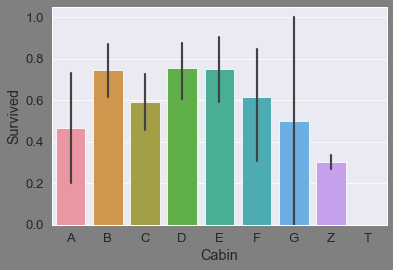

In [18]:
sns.barplot(x= 'Cabin', y = 'Survived', data = traindf ,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', 'T'])

In [19]:
def CabinRegroup(data1, data2) :
    data = combine(data1, data2) 
    data['Cabin'] = data['Cabin'].replace(['B', 'D', 'E'], 'H') #Represeting as High rate
    data['Cabin'] = data['Cabin'].replace(['C', 'F'], 'M') #Represeting as Medium rate
    data['Cabin'] = data['Cabin'].replace(['T', 'G', 'A'], 'L') #Represeting as Low rate
    data['Cabin'] = data['Cabin'].replace(['Z'], 'X') #Represeting as missing data
    traindf, testdf = separate(data)
    return traindf, testdf

In [20]:
traindf, testdf = CabinRegroup(traindf, testdf)

### It's better that we combine both SibSp and Parch as they can be represented as family. 

In [21]:
def family(data1, data2):
    data = combine(data1, data2)
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    data['Alone'] = data['Family'].apply(lambda x: 1 if x == 1 else 0)
    data.drop(['SibSp', 'Parch'], axis=1, inplace = True)
    traindf, testdf = separate(data)
    return traindf, testdf

In [22]:
traindf, testdf = family(traindf, testdf)

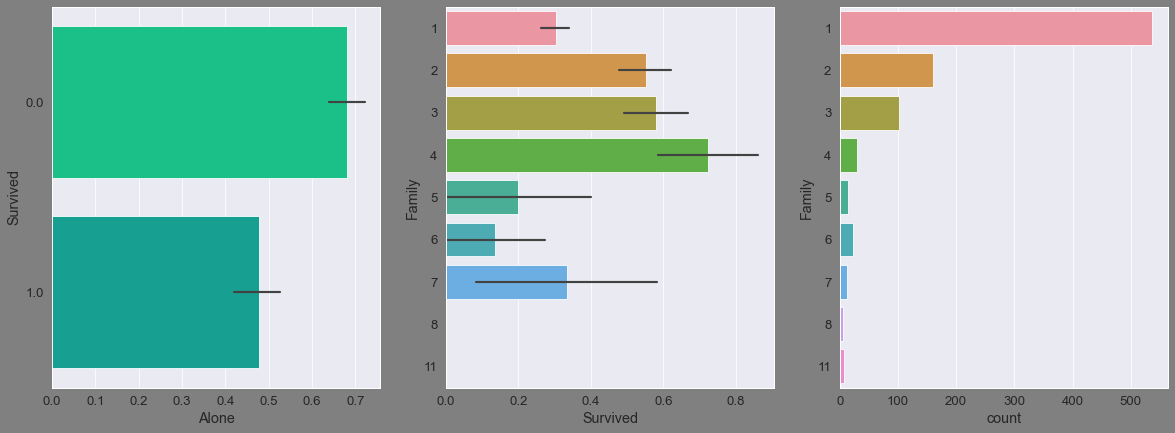

In [23]:
f,ax = plt.subplots(1,3,figsize=[20,7])
sns.barplot(x = 'Alone', y = 'Survived', data = traindf,orient = 'h', ax = ax[0])
sns.barplot(x = 'Survived', y = 'Family', data = traindf,orient = 'h', ax = ax[1])
sns.countplot(y = 'Family',data = traindf, orient = 'h', ax = ax[2])
plt.show()

Most of the Passengers aboard were alone. The Passengers who were alone had a lower survival rate which is also true for Passengers who had more than 4 members with them.

In [24]:
#Separating data into group to take care it as categorical data
def FamilyGroup(data1, data2):
    data = combine(data1, data2)
    data.loc[data['Family'] > 2, 'FamilyGroup'] = 3
    data.loc[data['Family'] == 1, 'FamilyGroup'] = 1
    data.loc[data['Family'] == 2, 'FamilyGroup'] = 2
    data['FamilyGroup'] = data['FamilyGroup'].astype(int)
    traindf, testdf = separate(data)
    return traindf, testdf

In [25]:
traindf, testdf = FamilyGroup(traindf, testdf)

In [26]:
#Separating data into group to take care it as categorical data
def mapping(data1, data2):
    data = combine(data1, data2)
    data['Embarked'] = data['Embarked'].map({'C':1, 'S':2, 'Q':3})
    data['Sex']= data['Sex'].map({'male': 1,'female':0})
    data['CabinGroup']=data['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})
    traindf, testdf = separate(data)
    return traindf, testdf

In [27]:
traindf, testdf = mapping(traindf, testdf)

In [28]:
traindf['CabinGroup'].value_counts()

3    687
0    112
1     72
2     20
Name: CabinGroup, dtype: int64

In [29]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,X,2,2,0,2,3
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,M,1,2,0,2,1
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,X,2,1,1,1,3
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,0,2,1
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,1,1,3


In [30]:
#Extract the title of each passenger
def ExtractTitles(data1, data2):
    data = combine(data1, data2)
    data['Title'] = data['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
    data['TitleGroup'] = 0
    data['TitleGroup'] = data['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess',],0,          #High
                                            regex = True).replace(['Mrs','Miss','Master',],1,               #Medium
                                            regex = True).replace(['Dr','Major','Col','Mr'],2,              #Low
                                            regex = True).replace(['Don','Rev','Capt','Jonkheer','Dona'],4, #Least
                                            regex = True)
    traindf, testdf = separate(data)
    return traindf, testdf
##['Mrs','Miss','Mme','Ms','Lady','Mlle','Countess','Dona'],'female'
##['Sir','Don','Rev','Mr',],'male'
##['Col','Dr','Col','Capt','Major','Jonkheer','Master'],'Special'

In [31]:
traindf, testdf = ExtractTitles(traindf, testdf)

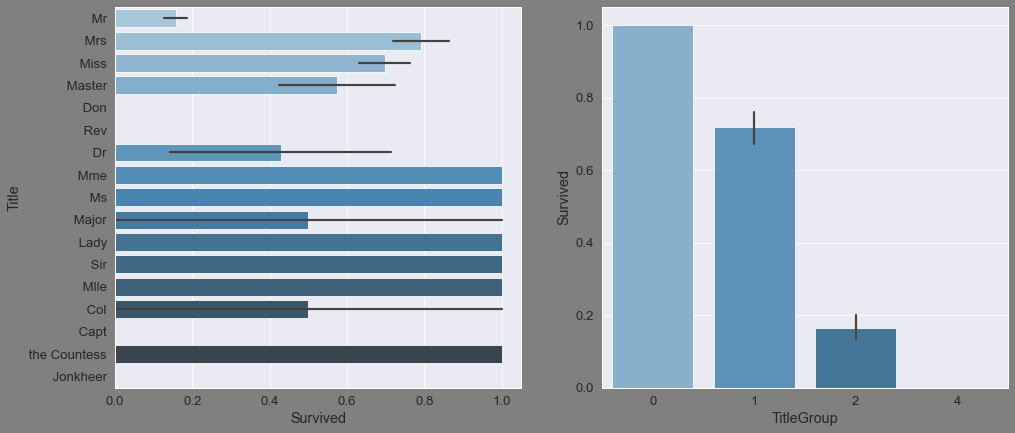

In [32]:
f,ax = plt.subplots(1,2,figsize=[16,7])
sns.barplot(x='Survived', y='Title', data=traindf, palette='Blues_d', ax=ax[0])
sns.barplot(x='TitleGroup', y='Survived', data=traindf, palette='Blues_d', ax= ax[1])
plt.show()

### It's seem that high society has a greater chance of survival (0:High 1:Medium 2:Low)

In [33]:
def surname(data1, data2):
    data = combine(data1, data2)
    data['Surname'] = data['Name'].apply(lambda x: str(x).split(' ')[0].split(',')[0])
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    traindf, testdf = separate(data)
    return traindf, testdf
#groupby will group up any passenger with common surname
#apply x.shape[0] ---> x.shape will give the shape of data such as (1, 4) = 1 row 4 columns
#        x.shape[0] will extract how many person that using the same surname (how many row in data that already group)
#data.map(Shares) map that surname with the number of persons.

In [34]:
traindf, testdf = surname(traindf, testdf)

In [35]:
traindf

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname
PassengerId,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,X,2,2,0,2,3,Mr,2,Braund,2
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,M,1,2,0,2,1,Mrs,1,Cumings,2
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,X,2,1,1,1,3,Miss,1,Heikkinen,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,0,2,1,Mrs,1,Futrelle,2
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,1,1,3,Mr,2,Allen,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.0,2,"Montvila, Rev. Juozas",1,27.0,211536,13.0000,X,2,1,1,1,3,Rev,4,Montvila,1
888,1.0,1,"Graham, Miss. Margaret Edith",0,19.0,112053,30.0000,H,2,1,1,1,0,Miss,1,Graham,3
889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,W./C. 6607,23.4500,X,2,4,0,3,3,Miss,1,Johnston,4


In [36]:
# Example of a couple that have the same surname.
traindf.loc[traindf['Ticket'].str.contains('113803')]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname
PassengerId,,,,,,,,,,,,,,,,,
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1,M,2,2,0,2,1,Mrs,1,Futrelle,2
138,0.0,1,"Futrelle, Mr. Jacques Heath",1,37.0,113803,53.1,M,2,2,0,2,1,Mr,2,Futrelle,2


In [37]:
def age_distribution(data1, data2):
    data = combine(data1, data2)
    data['Age'] = data['Age'].round()
    data.loc[data['Age'] <= 16, 'AgeGroup'] = 1.
    data.loc[(data['Age'] > 16) & (data['Age'] <= 40), 'AgeGroup'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] < 60), 'AgeGroup'] = 3
    data.loc[(data['Age'] >= 60), 'AgeGroup'] = 4
    data['AgeGroup'] = data['AgeGroup'].astype(int)
    traindf, testdf = separate(data)
    return traindf, testdf

In [38]:
traindf, testdf = age_distribution(traindf, testdf)

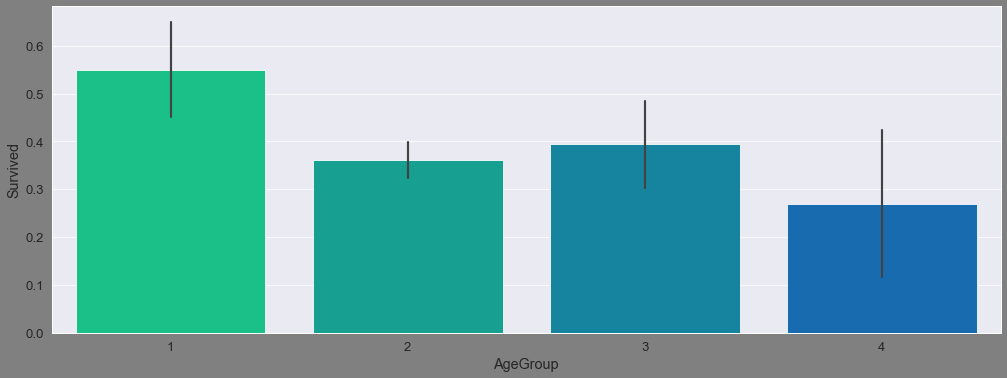

In [39]:
plt.figure(figsize = [17,6])
sns.barplot(x = traindf['AgeGroup'], y = traindf['Survived'])#data = traindf,)#ci = 95, orient = 'v')
#plt.rc('xtick',labelsize = 12)
plt.show()

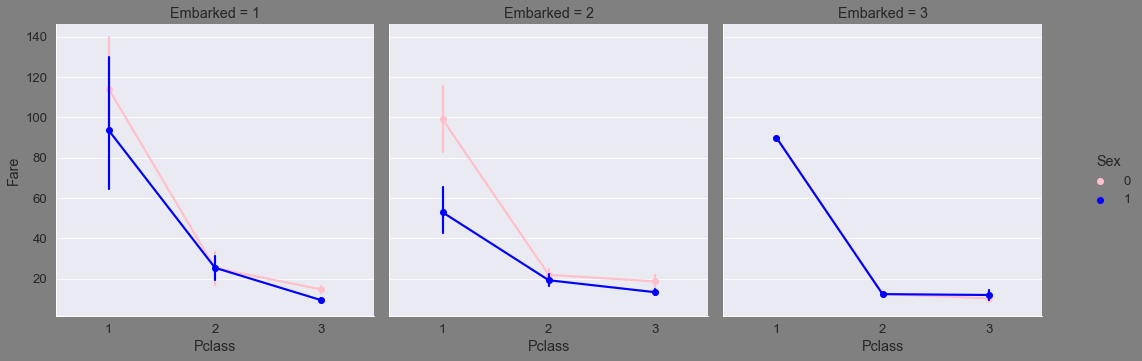

In [40]:
sns.catplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', data = traindf, margin_titles = True
            , palette=sns.color_palette(['pink', 'blue']), kind='point')
plt.show()

There is much difference for 1st and 2nd Embarkation for 1st and 3rd Pclass in terms of fare for males and females while the 2nd class fare is similar in all the Embarkations.

## Grouping Fare and creating a new column called 'FareGroup' with their means by Pclass

In [41]:
def fare_distribution(data1, data2):
    data= combine(data1, data2)
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    data['FareGroup'] = data['FareGroup'].astype(int)
    traindf, testdf    = separate(data)
    return traindf, testdf
#data['Fare'] = data['Fare'].map({'Very Low': 1, 'Low': 2, 'Medium':3, 'High':4})

In [42]:
traindf, testdf = fare_distribution(traindf, testdf)

In [43]:
def Tickets(data1, data2):
    data = combine(data1,data2)
    #Creating a new column to display the freq of the tickets present
    data['SharedTicketCount'] = data.groupby('Ticket')[['Fare']].transform('count').astype(int)
    #Removing any characters other than alphabets and numbers to count the ticket length
    data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')
    data['TicketLength'] = data['Ticket'].apply(lambda x: len(str(x)))
    traindf, testdf    = separate(data)
    return traindf, testdf

In [44]:
traindf, testdf = Tickets(traindf, testdf)

C:\Users\SNatchanon\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [45]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,...,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,A521171,7.2500,X,2,2,...,2,3,Mr,2,Braund,2,2,1,1,7
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC17599,71.2833,M,1,2,...,2,1,Mrs,1,Cumings,2,2,3,2,7
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,STONO23101282,7.9250,X,2,1,...,1,3,Miss,1,Heikkinen,1,2,1,1,13
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,M,2,2,...,2,1,Mrs,1,Futrelle,2,2,3,2,6
5,0.0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,X,2,1,...,1,3,Mr,2,Allen,2,2,1,1,6


In [46]:
traindf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Family', 'Alone', 'FamilyGroup', 'CabinGroup', 'Title',
       'TitleGroup', 'Surname', 'SharedSurname', 'AgeGroup', 'FareGroup',
       'SharedTicketCount', 'TicketLength'],
      dtype='object')

In [47]:
# All numerical data has transform to categorical data by now
X = traindf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
y = traindf['Survived'].astype(int)
X.shape , y.shape

((891, 11), (891,))

In [48]:
X, y

(             Pclass  Sex  Embarked  FamilyGroup  CabinGroup  TitleGroup  \
 PassengerId                                                               
 1                 3    1         2            2           3           2   
 2                 1    0         1            2           1           1   
 3                 3    0         2            1           3           1   
 4                 1    0         2            2           1           1   
 5                 3    1         2            1           3           2   
 ...             ...  ...       ...          ...         ...         ...   
 887               2    1         2            1           3           4   
 888               1    0         2            1           0           1   
 889               3    0         2            3           3           1   
 890               1    1         1            1           1           2   
 891               3    1         3            1           3           2   
 
          

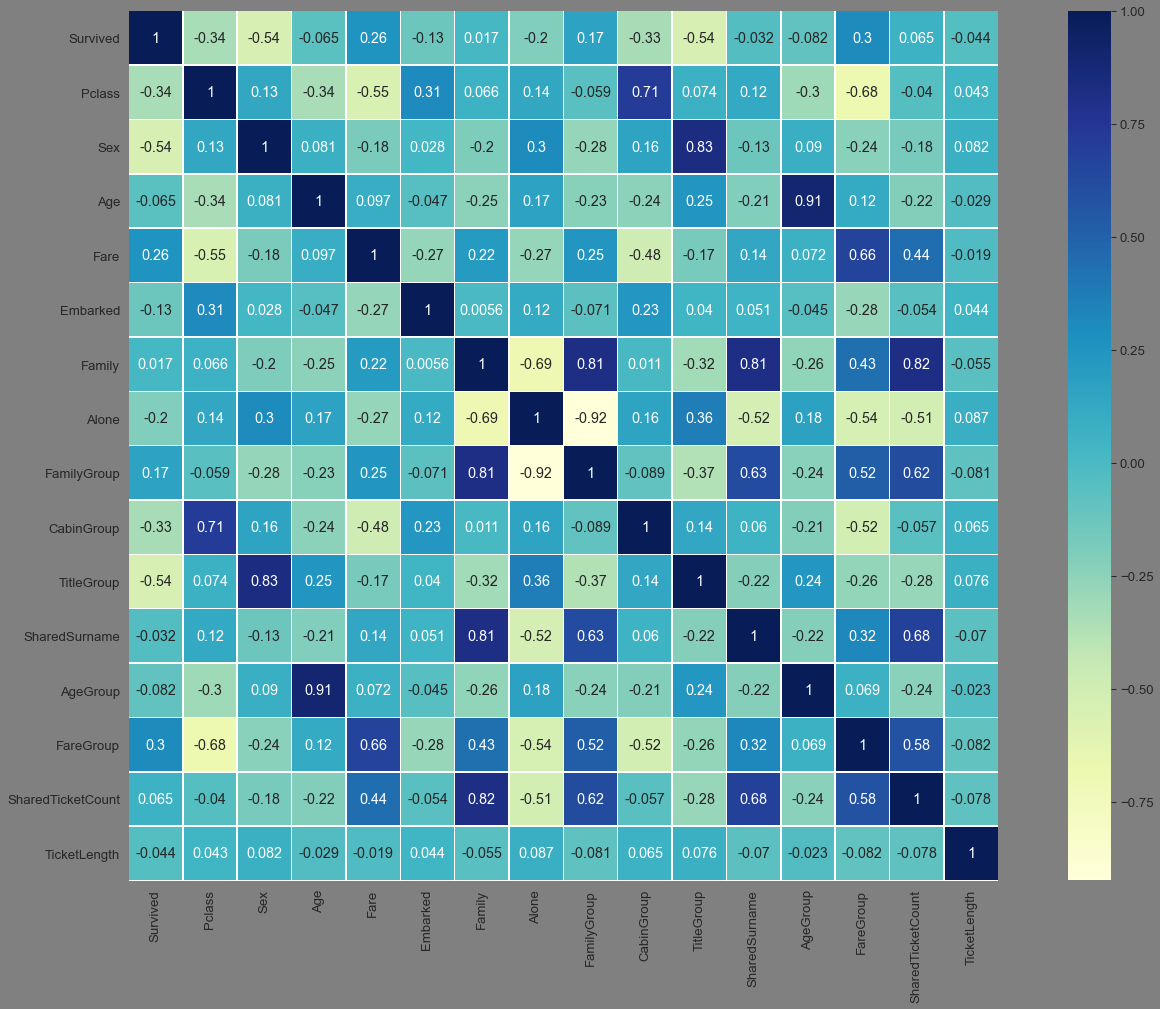

In [49]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(traindf.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)
plt.show()

Since categorical features have been created from the features present in the dataset taking only the categorical for training the models.

In [50]:
traindf.corr()['Survived'].sort_values(ascending=False)

Survived             1.000000
FareGroup            0.304774
Fare                 0.257307
FamilyGroup          0.166431
SharedTicketCount    0.064962
Family               0.016639
SharedSurname       -0.031974
TicketLength        -0.044156
Age                 -0.064577
AgeGroup            -0.082444
Embarked            -0.131042
Alone               -0.203367
CabinGroup          -0.332002
Pclass              -0.338481
TitleGroup          -0.541724
Sex                 -0.543351
Name: Survived, dtype: float64

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance


In [52]:
X.columns

Index(['Pclass', 'Sex', 'Embarked', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

In [53]:
npX = np.array(X).copy()
npy = np.array(y).copy()

In [71]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC(probability=True)

In [72]:
from sklearn.ensemble import VotingClassifier
clf_vote = VotingClassifier(estimators=[('svc', clf_svm), ('rf', clf_rf), ('lr', clf_lr), ('etc', clf_et), ('ada', clf_ada), ('bc', clf_bc), ('dt', clf_dt)], voting='soft')

In [73]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','LogisticRegression','SVM','VoteEnsemble']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_lr, clf_svm, clf_vote]


In [74]:
for model in models:
    score = cross_val_score(model, npX, npy, scoring='f1', cv= 10, n_jobs= -1).mean()
    print(score)
    scores.append(score)

0.7614767940347619
0.749288562751029
0.7348783895463087
0.76613175521605
0.7350920324964464
0.7671563523199559
0.7691946310378261
0.762241387184559


In [75]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [76]:
mode

,score
SVM,0.769195
LogisticRegression,0.767156
AdaBoost,0.766132
VoteEnsemble,0.762241
RandomForest,0.761477
ExtraTrees,0.749289
DecisionTree,0.735092
Bagging,0.734878


In [ ]:
parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                              'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

In [ ]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 5, 
                        scoring = 'f1', verbose=10, n_jobs=-1)
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()

In [ ]:
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm)
print(best_score_svm)

In [ ]:
#best_params_svm = {'C':5,'kernel':'rbf', 'decision_function_shape':'ovo','probability':True,'random_state':7,'gamma':0.1}
print(best_params_svm)

In [ ]:
score = cross_val_score(SVC(**best_params_svm), npX, npy, scoring='f1', cv= 10, n_jobs= -1).mean()
print(score)

In [ ]:
from sklearn.ensemble import VotingClassifier
clf_vote = VotingClassifier(estimators=[
...         ('svc', clf_svm), ('rf', clf_rf), ('lr', clf_lr), ('etc', clf_et), ('ada', clf_ada), ('bc', clf_bc), ('dt', clf_dt)], voting='hard')

In [ ]:
clf_vote.fit(npX, npy)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components=  2).fit_transform(X_test)

In [ ]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = t.astype(np.int64)
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')
plt.show()

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,), dtype={int, float}
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [ ]:
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import learning_curve

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15), constrained_layout=True)
title = "Learning Curves (SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVC(**best_params_svm)
plot_learning_curve(estimator, title, npX, npy, axes=axes[:], ylim=(0.7, 1.01), cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 20))

plt.show()

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [ ]:
clf_svm = SVC(**best_params_svm)
clf_svm.fit(npX,npy)
testdf = testdf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
nptest = np.array(testdf)
pred = clf_svm.predict(nptest)
predictions = pd.DataFrame(pred, index = testdf.index, columns = ['Survived'])

In [ ]:
predictions

In [ ]:
y

In [ ]:
np.linspace(.1, 1.0, 5)